In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
train_horse_dir = os.path.join("datasets/horses-or-humans/horses")
train_human_dir = os.path.join("datasets/horses-or-humans/humans")
valid_horse_dir = os.path.join("datasets/valid-horses-or-humans/horses")
valid_human_dir = os.path.join("datasets/valid-horses-or-humans/humans")

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
valid_horse_names = os.listdir(valid_horse_dir)
valid_human_names = os.listdir(valid_human_dir)

In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(300, 300, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'datasets/horses-or-humans/',  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary',)

valid_generator = valid_datagen.flow_from_directory(
    "datasets/valid-horses-or-humans/",
    target_size=(300, 300),
    batch_size=32,
    class_mode="binary",)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=8,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
8/8 [==============================] - 30s 3s/step - loss: 0.6922 - accuracy: 0.4975 - val_loss: 0.6718 - val_accuracy: 0.5625
Epoch 2/15
8/8 [==============================] - 17s 2s/step - loss: 0.6836 - accuracy: 0.5963 - val_loss: 0.6510 - val_accuracy: 0.8555
Epoch 3/15
8/8 [==============================] - 19s 2s/step - loss: 0.6673 - accuracy: 0.6318 - val_loss: 0.6195 - val_accuracy: 0.6953
Epoch 4/15
8/8 [==============================] - 17s 2s/step - loss: 0.6470 - accuracy: 0.6652 - val_loss: 0.5604 - val_accuracy: 0.7773
Epoch 5/15
8/8 [==============================] - 16s 2s/step - loss: 0.6826 - accuracy: 0.6429 - val_loss: 0.6917 - val_accuracy: 0.5234
Epoch 6/15
8/8 [==============================] - 16s 2s/step - loss: 0.5874 - accuracy: 0.7453 - val_loss: 0.5356 - val_accuracy: 0.7227
Epoch 7/15
8/8 [==============================] - 16s 2s/step - loss: 0.5621 - accuracy: 0.7397 

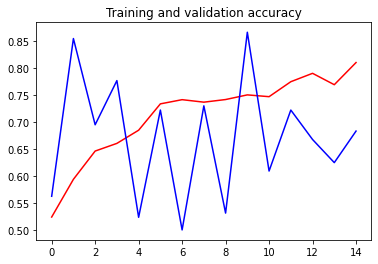

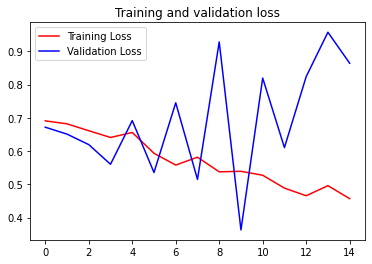

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()